In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
df_heart = pd.read_csv("heart.csv")

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
X = df_heart.iloc[:, :13]
y = df_heart.iloc[:, 13]

In [27]:
std = StandardScaler()

X_std = std.fit_transform(X)


C:\Users\90552\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


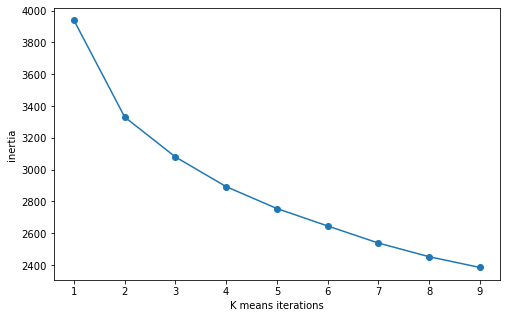

In [29]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(X_std)
    SSE.append(kmeans.inertia_)


frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(8,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('K means iterations')
plt.ylabel('inertia')
plt.show()

17 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


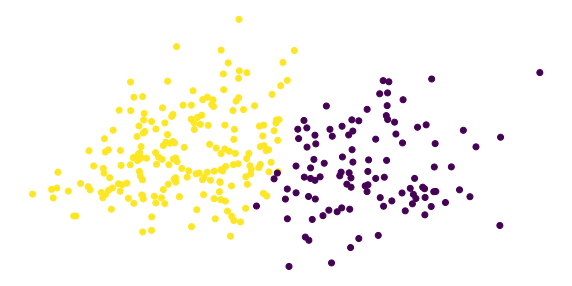

In [33]:
pca = PCA(n_components=2).fit_transform(X_std)
k_means = KMeans(n_clusters=2,random_state=123)
%timeit k_means.fit(X_std)

y_tahmin = k_means.predict(X_std)

plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.axis('off')
plt.show()

In [ ]:
#Aşağıdaki çizimde, sayılar her gözlem için algoritma tarafından atanan kümeyi göstermektedir. 
#Renkler gerçek sınıfları gösterir.Buna göre algoritma tarafından atanan küme cok basarılıdır diyemeyiz.

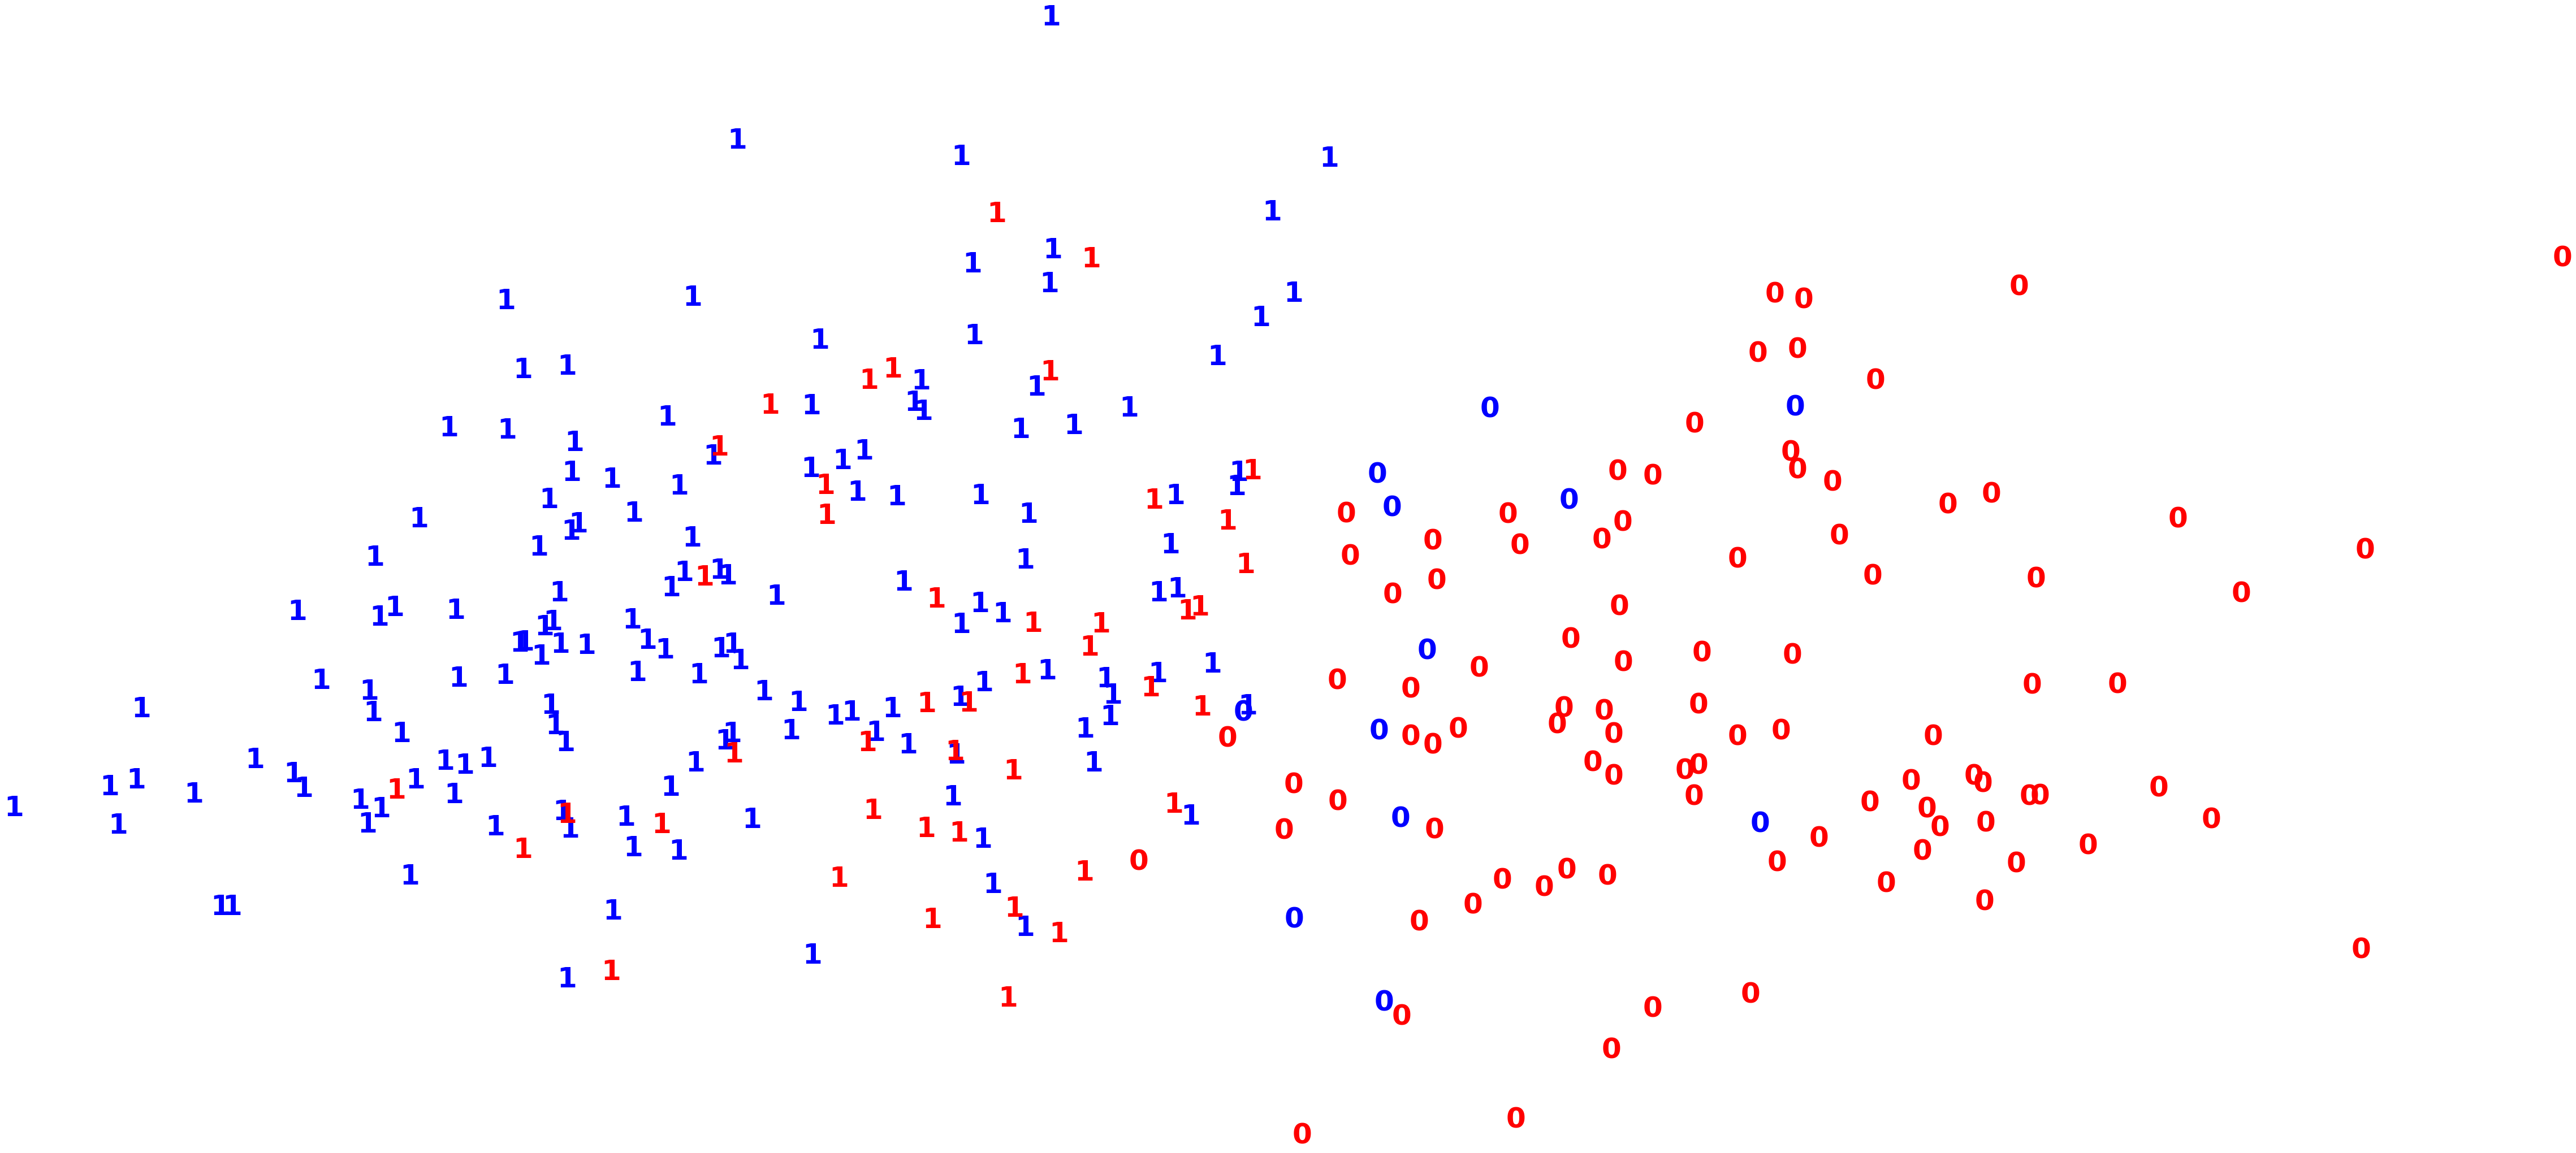

In [34]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_tahmin[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()